AUC ROC只适合二分类

参数为CAPE和CI时：

AUC for LR: 0.660；AUC for RF: 0.628

AUC for SVM: 0.585；AUC for LDA: 0.660

AUC for KNN: 0.418；AUC for CART: 0.386

AUC for GBDT: 0.664；AUC for NB: 0.673

原始参数：

AUC for LR: 0.798；AUC for RF: 0.739

AUC for SVM: 0.672；AUC for LDA: 0.785

AUC for KNN: 0.606；AUC for CART: 0.526

AUC for GBDT: 0.759；AUC for NB: 0.640

In [1]:
import pandas
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #线性判别分析#
from sklearn.naive_bayes import GaussianNB #朴素贝叶斯分类器#
from sklearn.svm import SVC #支持向量机#
from sklearn.linear_model import LogisticRegression #逻辑回归#
from sklearn.neighbors import KNeighborsClassifier #K临近#
from sklearn.tree import DecisionTreeClassifier #决策树分类器CART#
from sklearn.cluster import KMeans #kmeans聚类#
from sklearn.ensemble import RandomForestClassifier #随机森林#
from sklearn.ensemble import GradientBoostingClassifier #梯度提升决策树(GBDT)#

In [2]:
dataset=pandas.read_excel('Case.xlsx',sheet_name='initial')
print(dataset.shape)

(2440, 21)


In [4]:
print(dataset.head())

        Type      SI         LIFT       SWEAT      KI         CROSS  \
0          1       1.70       2.39     208.62       34.1       20.6   
1          1       4.31       4.75     208.73       31.0       18.4   
2          1       7.03       7.11     182.79       27.2       16.6   
3          1      -1.27      -4.95     243.20       37.7       20.5   
4          1       0.32      -1.74     245.71       26.1       19.5   

       VERT       TOT       CAPE      CI     ...      LCLT       LCLP   \
0       21.5       42.1     0.72      -0.21  ...     291.18     960.89   
1       19.3       37.7     0.00       0.00  ...     290.57     960.00   
2       17.7       34.3     0.00       0.00  ...     288.78     953.60   
3       23.5       44.0  2467.30     -10.40  ...     297.61     931.15   
4       21.7       41.2   397.79      -0.63  ...     295.96     936.68   

       PTMML      MRMML      PW     Thick_era5        VWS  MaintainH  \
0     294.55      13.77      48.28    5730.279         2

In [3]:
array =dataset.values
X =array[:,1:18]
Y =array[:,19]
validation_size = 0.20
seed =7
X_train, X_test, y_train,y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [4]:
LR = LogisticRegression(max_iter=10000)
RF=RandomForestClassifier()
SVM=SVC()
LDA=LinearDiscriminantAnalysis()
KNN=KNeighborsClassifier()
CART=DecisionTreeClassifier()
GBDT=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=1,random_state=0)
NB=GaussianNB()
#kmeans=KMeans(n_clusters=3,random_state=0)

LR.fit(X_train, y_train)
RF.fit(X_train,y_train)
SVM.fit(X_train,y_train)
LDA.fit(X_train,y_train)
KNN.fit(X_train,y_train)
CART.fit(X_train,y_train)
GBDT.fit(X_train,y_train)
NB.fit(X_train,y_train)
#kmeans.fit(X_train,y_train)

GaussianNB()

In [5]:
#AUC 越大越好
from sklearn.metrics import roc_auc_score

LR_auc = roc_auc_score(y_test, LR.predict_proba(X_test)[:,1])
RF_auc = roc_auc_score(y_test, RF.predict_proba(X_test)[:,1])
SVM_auc = roc_auc_score(y_test, SVM.decision_function(X_test))
LDA_auc = roc_auc_score(y_test, LDA.predict_proba(X_test)[:,1])
KNN_auc = roc_auc_score(y_test, KNN.predict_proba(X_test)[:,1])
CART_auc = roc_auc_score(y_test, CART.predict_proba(X_test)[:,1])
GBDT_auc = roc_auc_score(y_test, GBDT.predict_proba(X_test)[:,1])
NB_auc = roc_auc_score(y_test, NB.predict_proba(X_test)[:,1])

print("AUC for LR: {:.3f}".format(LR_auc))
print("AUC for RF: {:.3f}".format(RF_auc))
print("AUC for SVM: {:.3f}".format(SVM_auc))
print("AUC for LDA: {:.3f}".format(LDA_auc))
print("AUC for KNN: {:.3f}".format(KNN_auc))
print("AUC for CART: {:.3f}".format(CART_auc))
print("AUC for GBDT: {:.3f}".format(GBDT_auc))
print("AUC for NB: {:.3f}".format(NB_auc))

AUC for LR: 0.798
AUC for RF: 0.752
AUC for SVM: 0.672
AUC for LDA: 0.785
AUC for KNN: 0.606
AUC for CART: 0.534
AUC for GBDT: 0.759
AUC for NB: 0.640


In [14]:
#逻辑回归 阈值设置
#调整阈值使AUC/F1-score提高
THRESHOLD = 0.164
y_pred = np.where(LR.predict_proba(X_test)[:,1] >= THRESHOLD, 1, 0)
y_pred_proba_new_threshold = (LR.predict_proba(X_test)[:,1] >= THRESHOLD).astype(int)

auc = roc_auc_score(y_test,LR.predict_proba(X_test)[:,1])
print("AUC for RF: {:.3f}".format(auc))

AUC for RF: 0.798


In [13]:
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))
print('TS-score: {:.3f}'.format(cm[1][1]/(cm[1][1]+cm[0][1]+cm[1][0])))

Confusion matrix: 
 [[389  58]
 [ 20  21]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.95      0.87      0.91       447
         1.0       0.27      0.51      0.35        41

    accuracy                           0.84       488
   macro avg       0.61      0.69      0.63       488
weighted avg       0.89      0.84      0.86       488

TS-score: 0.212


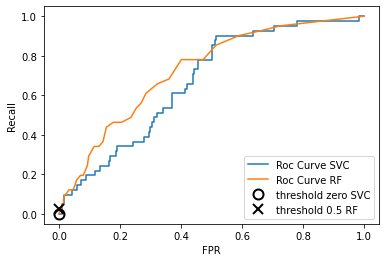

In [10]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, SVM.decision_function(X_test))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, RF.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="Roc Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="Roc Curve RF")
plt.xlabel("FPR")
plt.ylabel("Recall")

#找到最接近于0的阈值
close_zero = np.argmin(abs(thresholds))
#np.argmin() 列表中最小值的索引  abs() 绝对值
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero SVC",
fillstyle="none", c='k', mew=2)

close_default_rf = np.argmin(np.abs(thresholds_rf-0.5))
plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], 'x', markersize=10, label="threshold 0.5 RF",
fillstyle="none", c='k', mew=2)
plt.legend(loc=4)